**Benford's Law on Covid-19 Data**

The covid-19 data is accessed from Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE https://systems.jhu.edu/) data: https://github.com/CSSEGISandData/COVID-19/. It will make plots of daily cases against Benford's distribution. Total number of cases and the Kolmogorov-Smirnov statistical test results will be displayed on the plots.

*References:*

https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30120-1/fulltext

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html

https://www.statisticshowto.com/kolmogorov-smirnov-test/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import datetime
from scipy import stats

pd.to_datetime(datetime.datetime.today())

Timestamp('2021-04-13 19:14:00.657549')

# Total Cases - First Digit of Daily Confirmed Cases

In [ ]:
#%% load data
urlcovid = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(urlcovid)
df = df.groupby('Country/Region').sum()
df.reset_index(inplace=True)
country = df['Country/Region']
totalCase = df.iloc[:,-1]
df = df.drop(columns=['Lat','Long','Country/Region'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


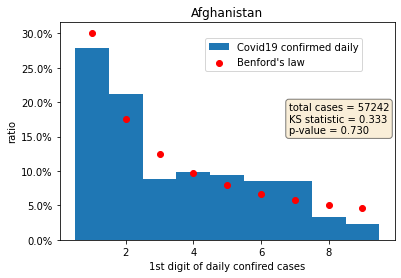

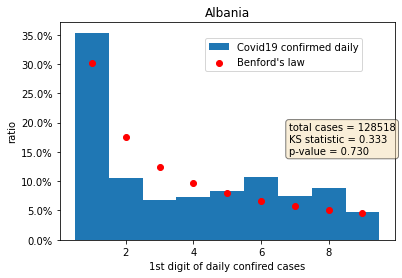

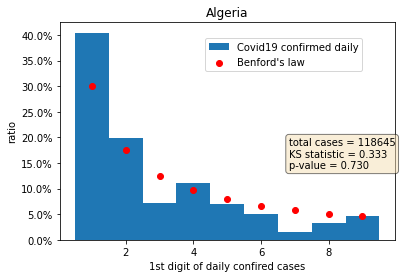

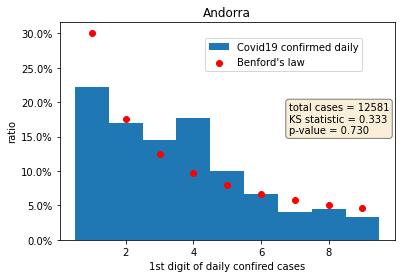

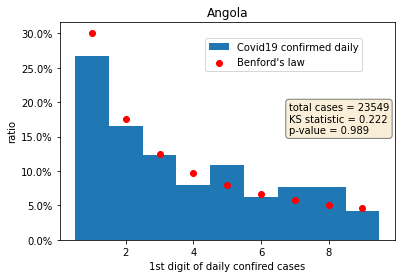

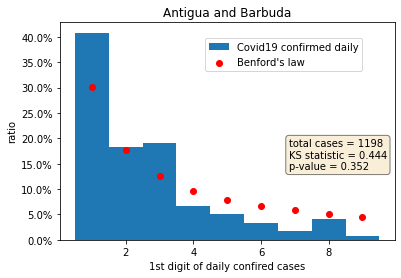

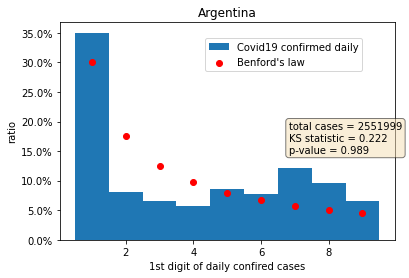

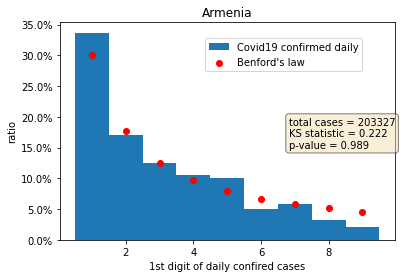

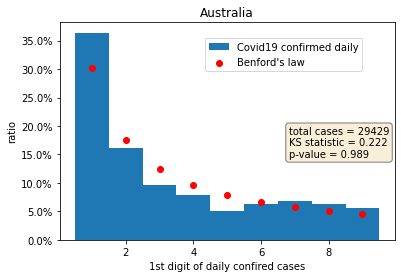

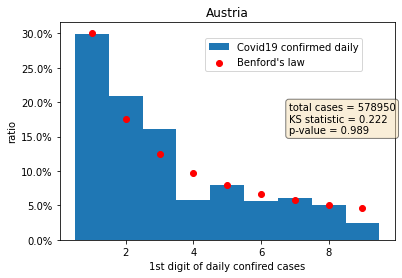

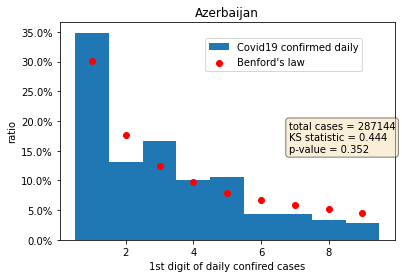

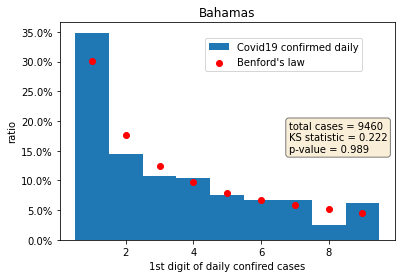

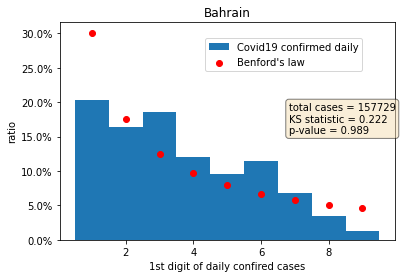

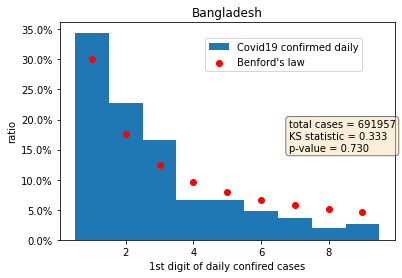

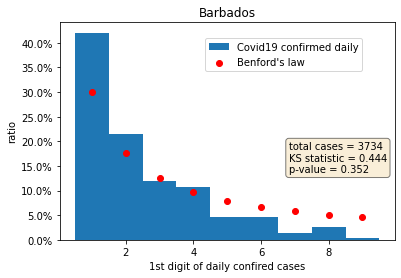

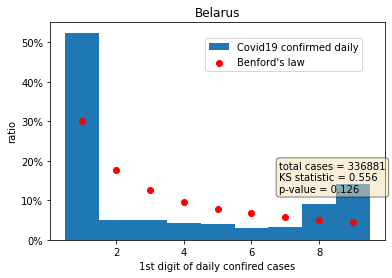

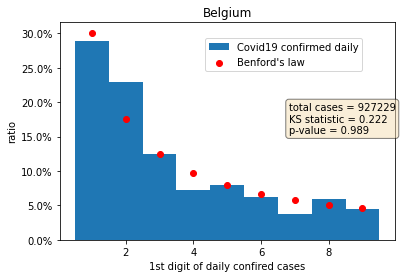

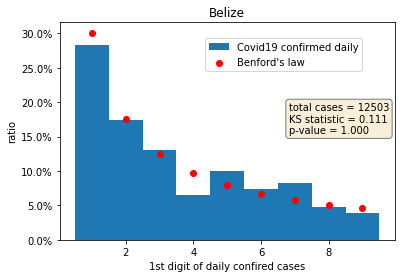

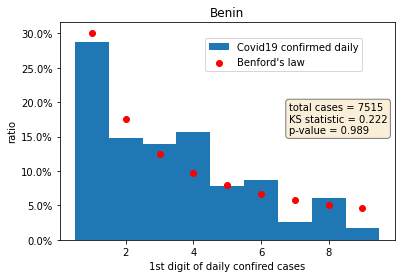

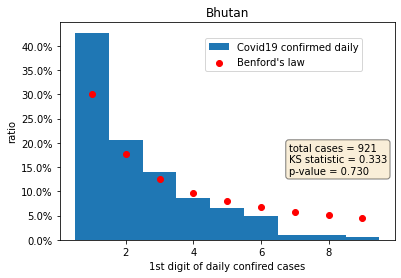

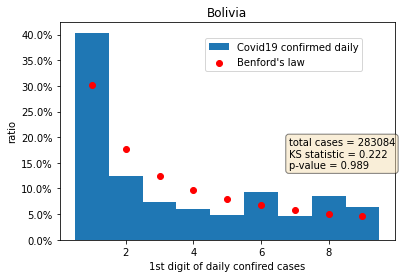

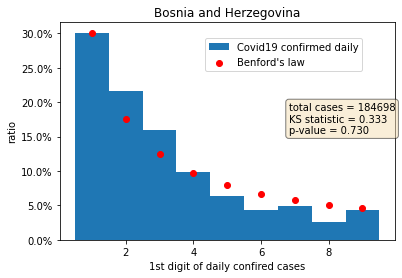

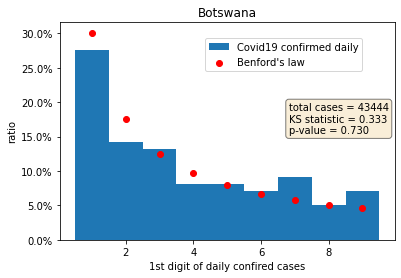

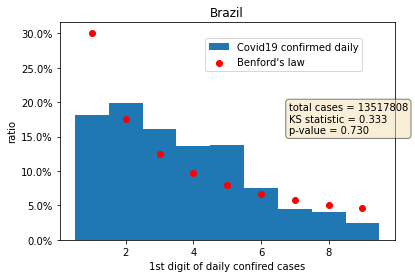

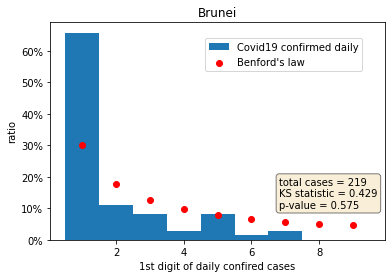

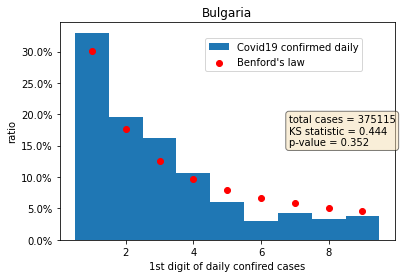

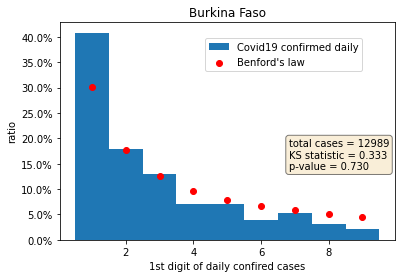

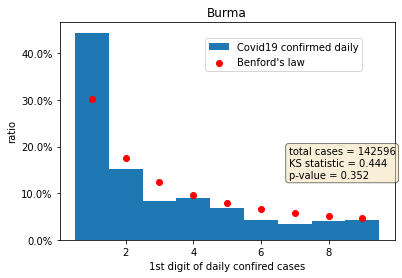

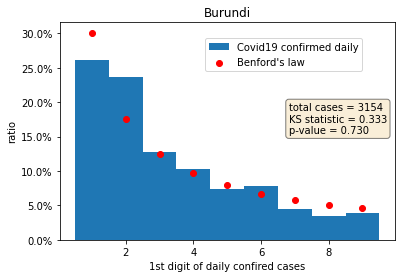

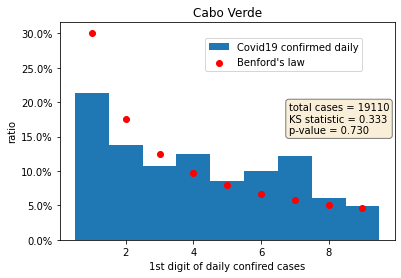

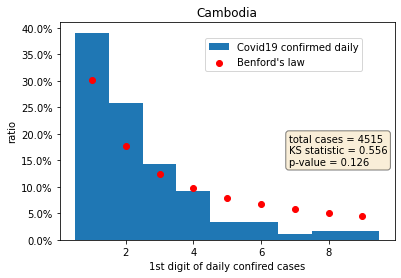

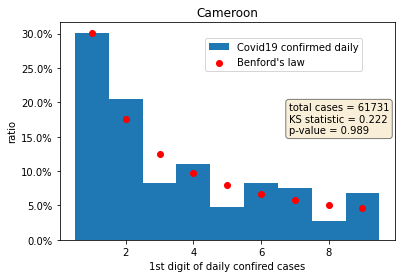

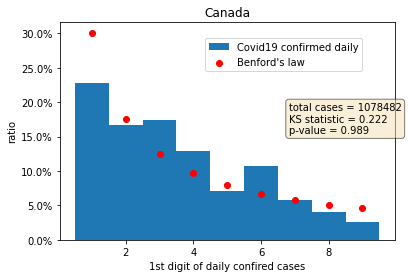

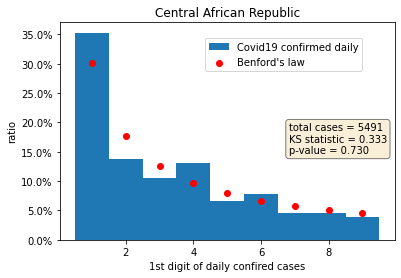

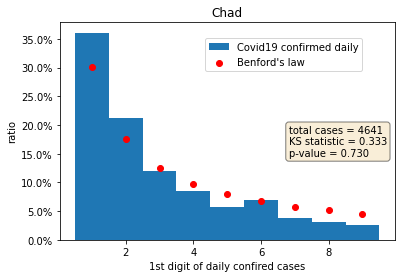

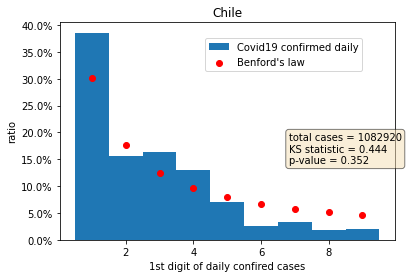

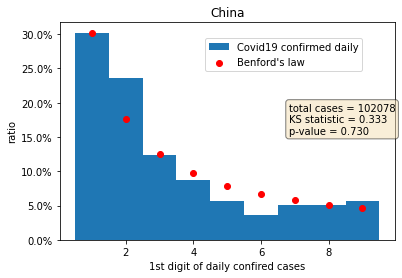

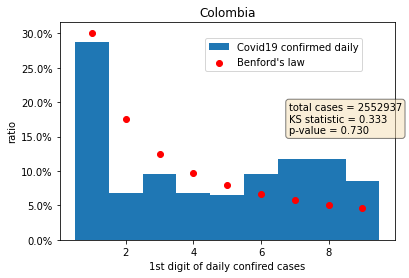

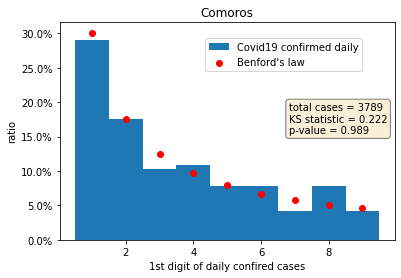

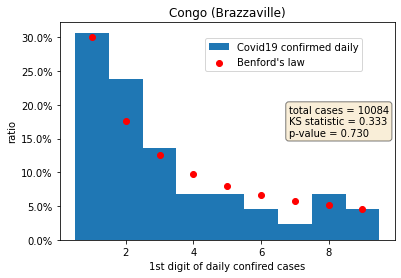

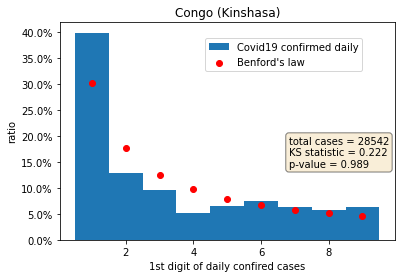

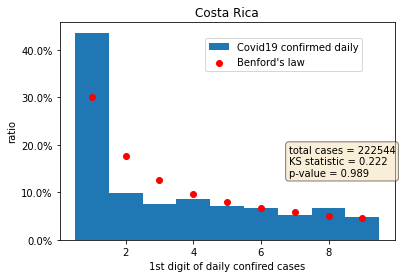

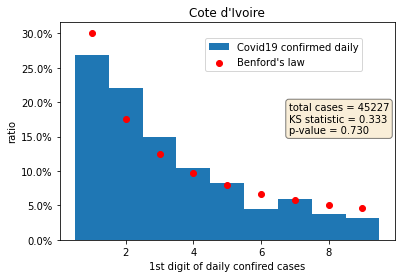

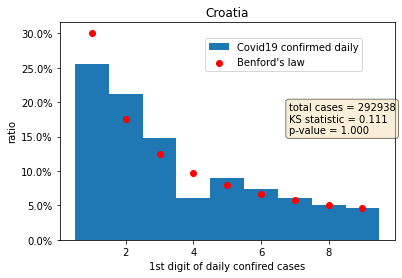

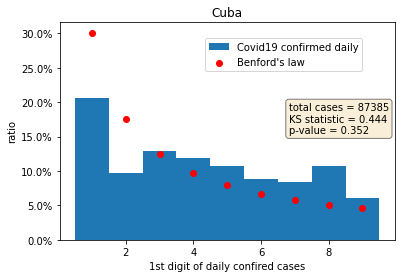

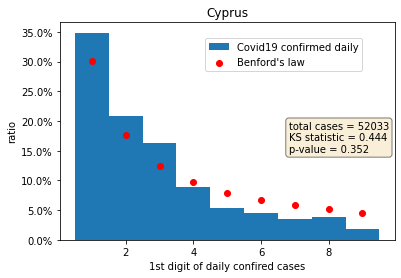

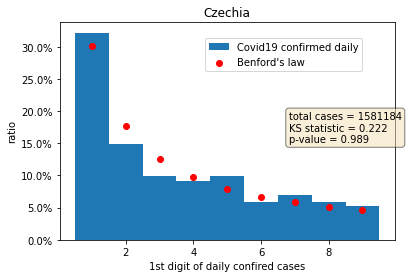

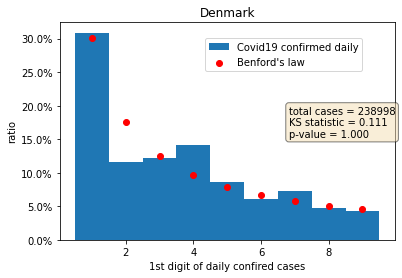

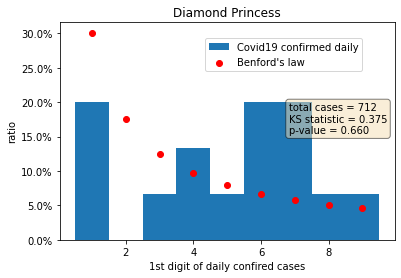

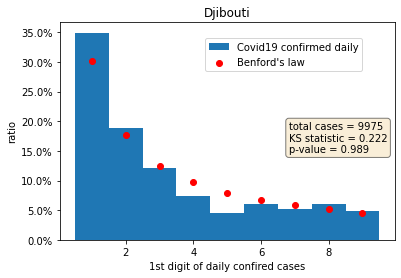

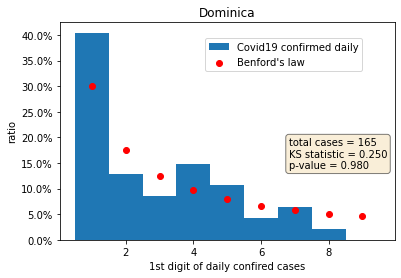

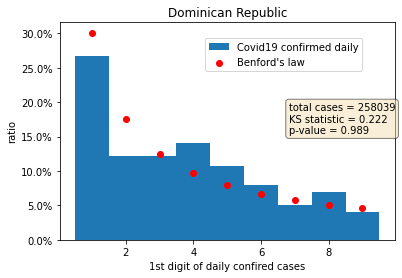

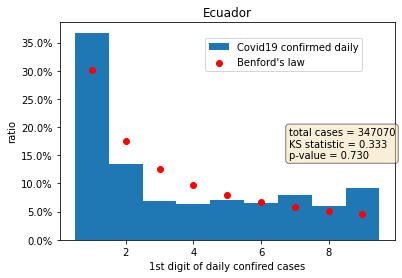

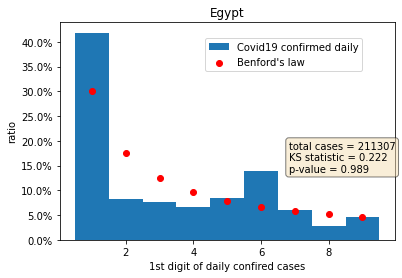

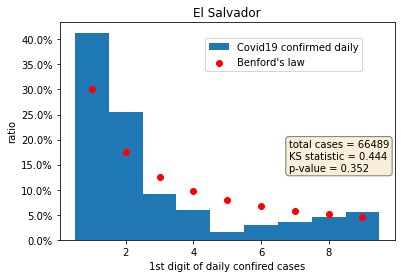

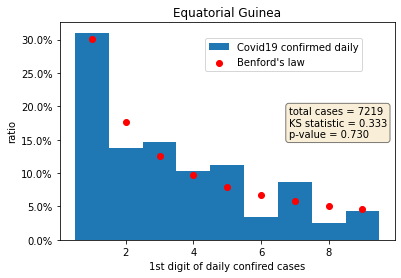

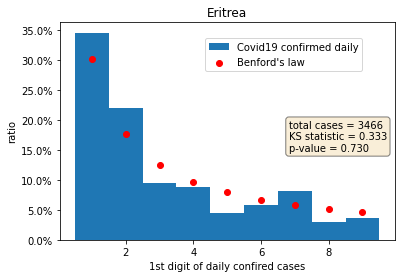

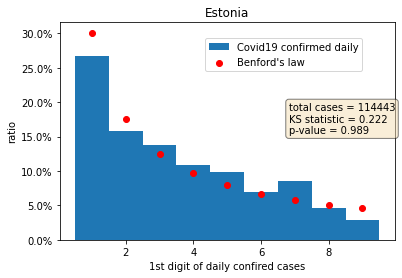

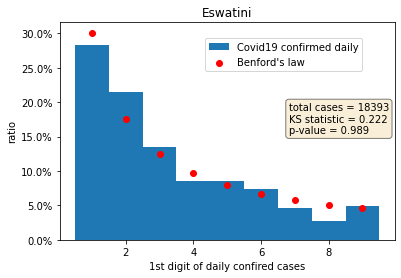

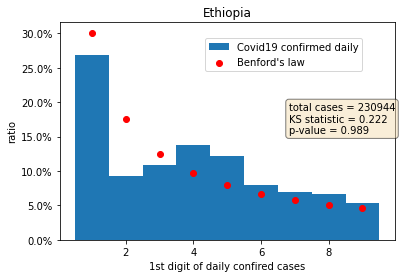

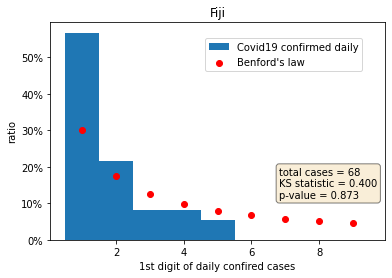

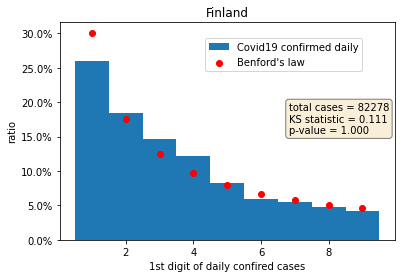

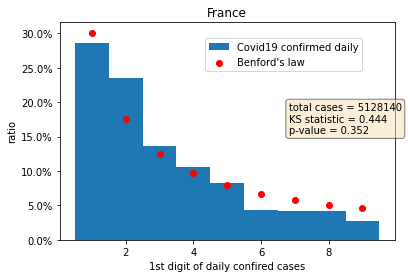

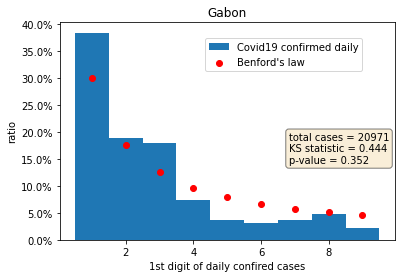

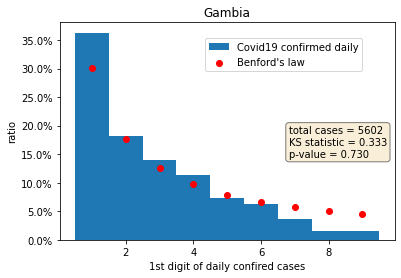

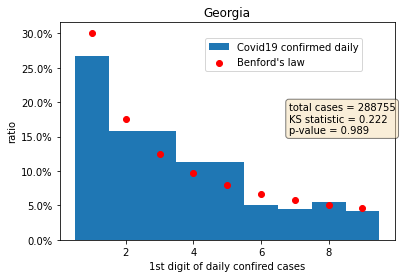

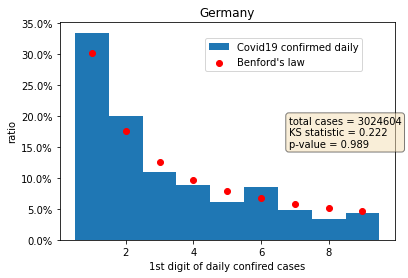

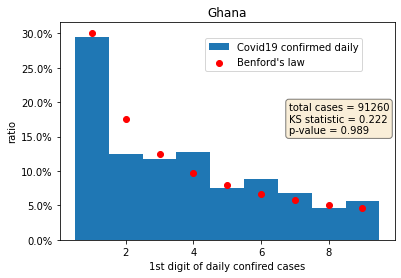

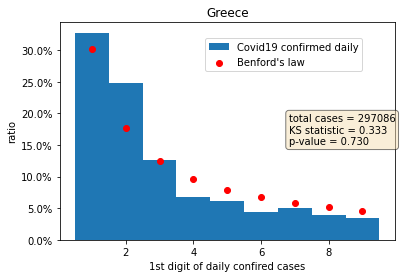

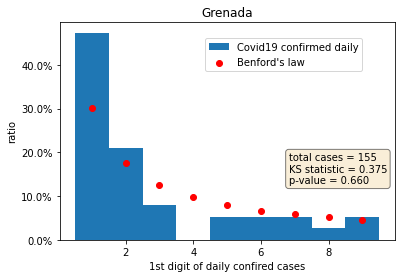

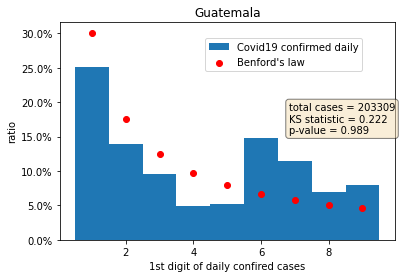

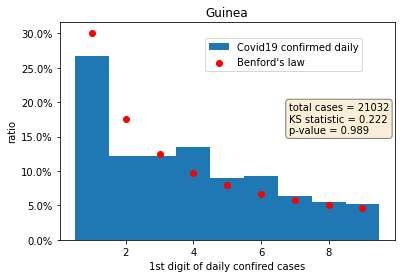

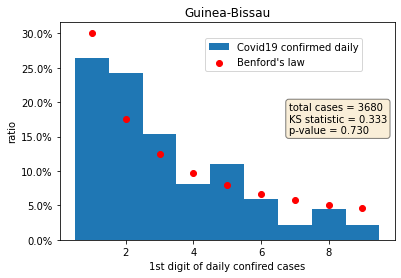

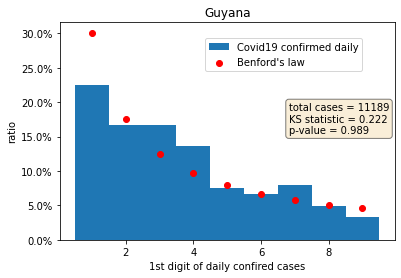

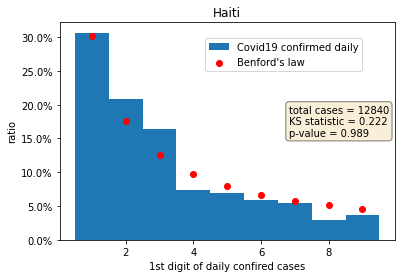

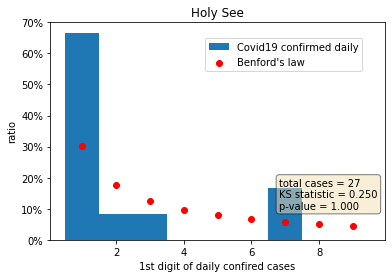

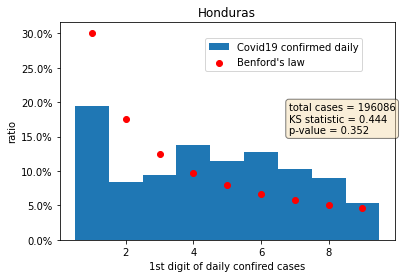

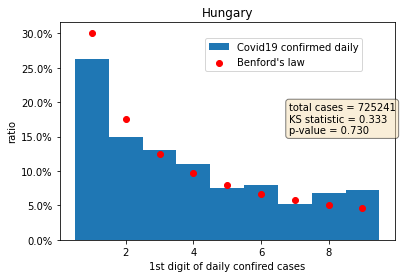

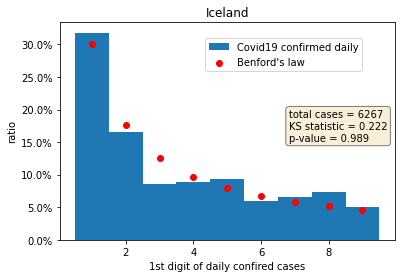

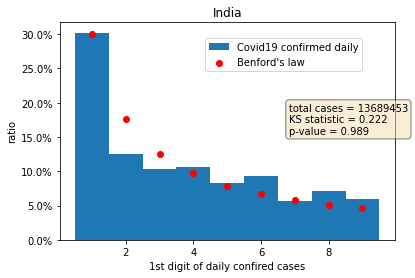

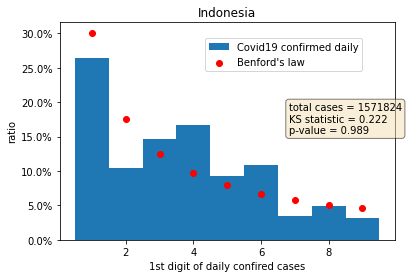

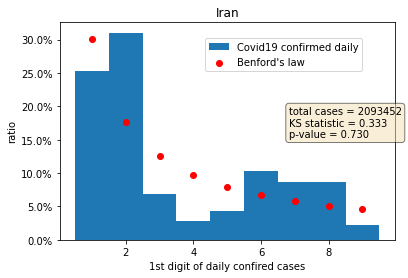

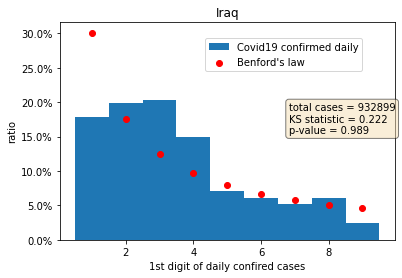

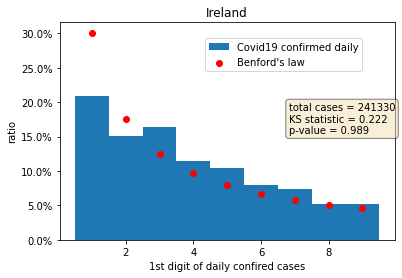

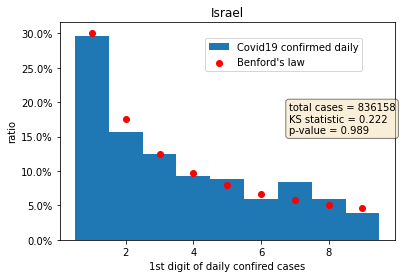

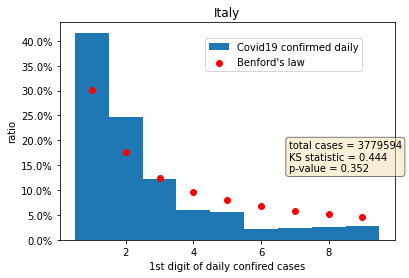

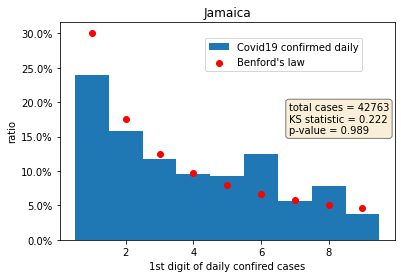

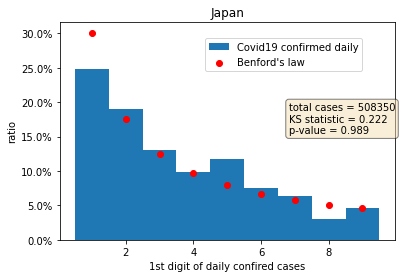

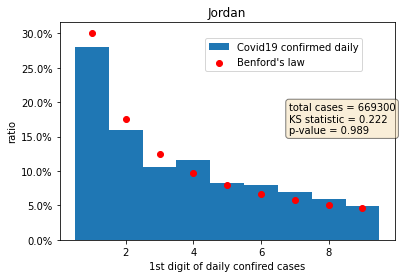

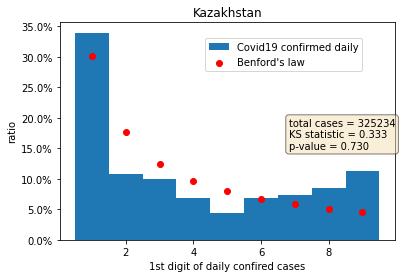

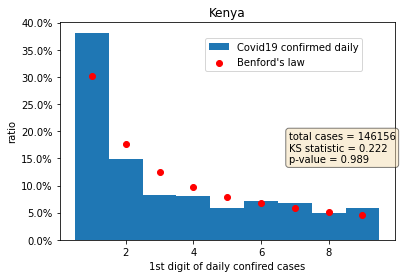

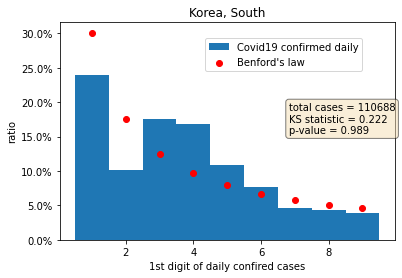

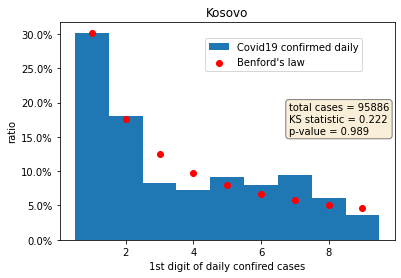

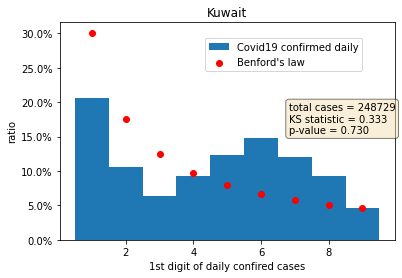

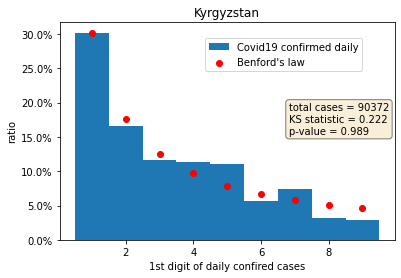

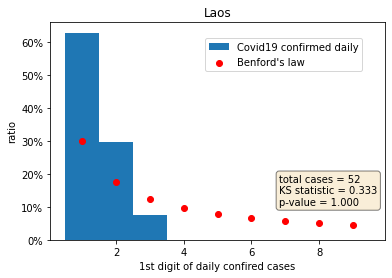

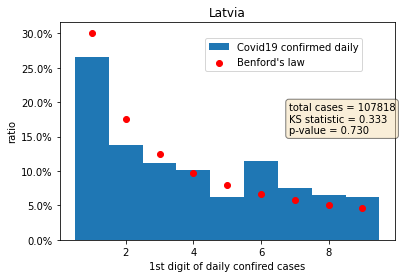

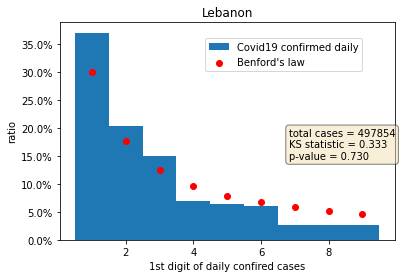

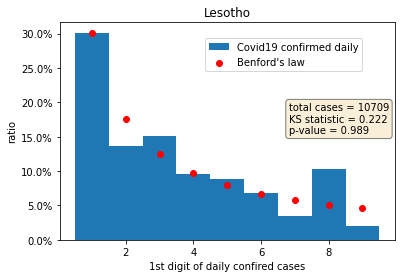

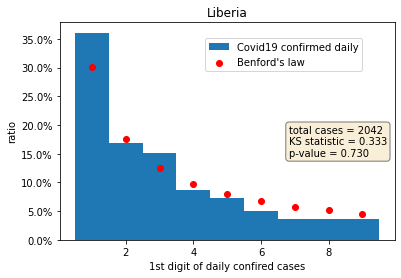

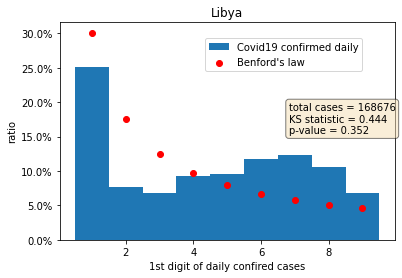

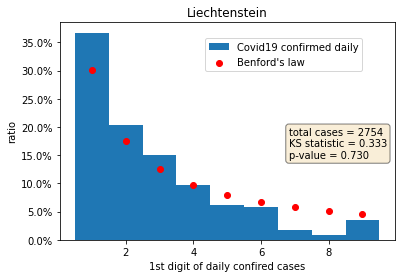

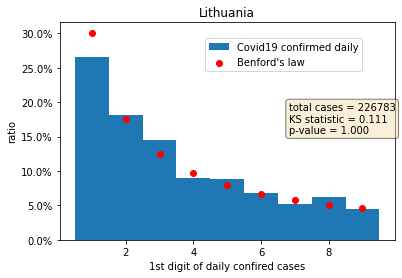

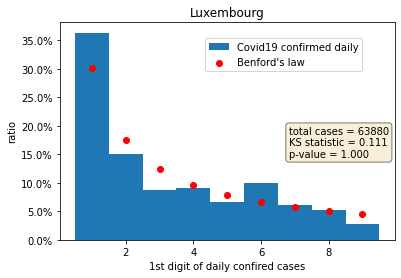

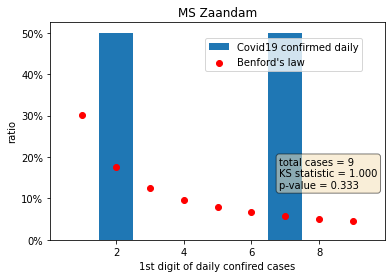

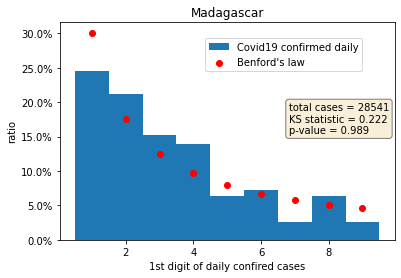

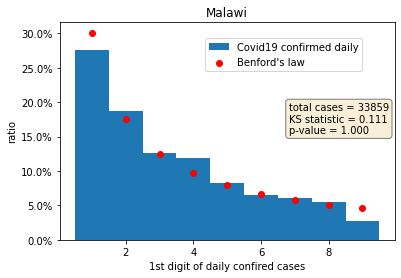

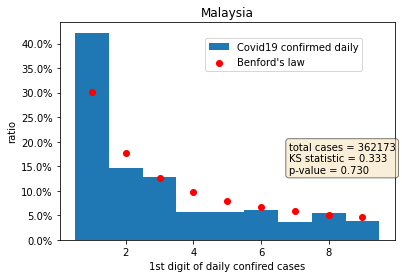

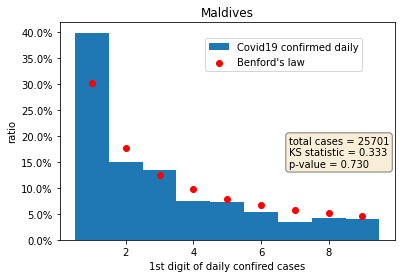

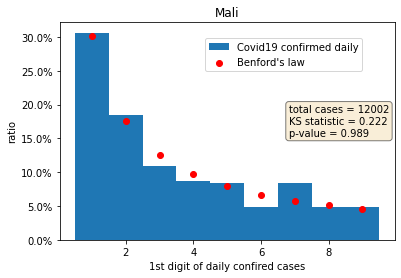

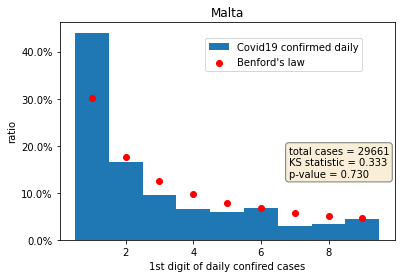

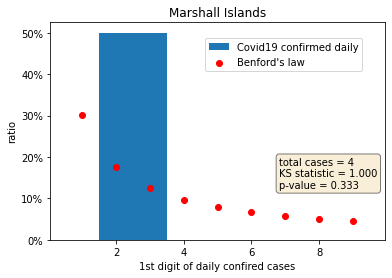

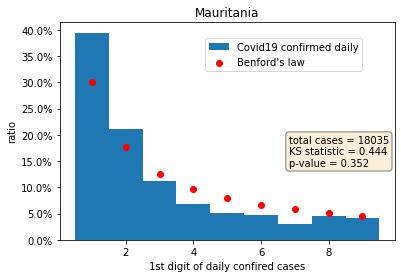

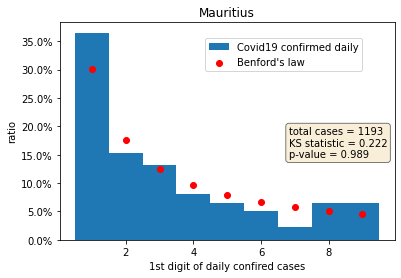

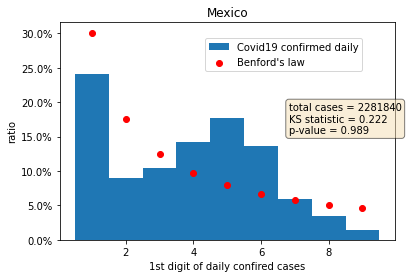

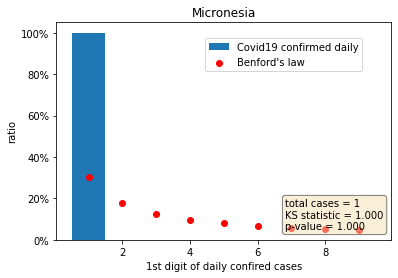

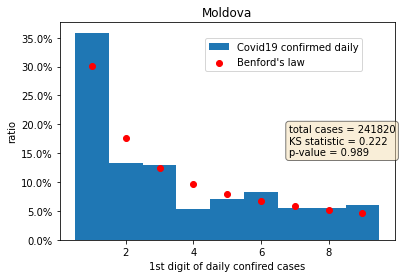

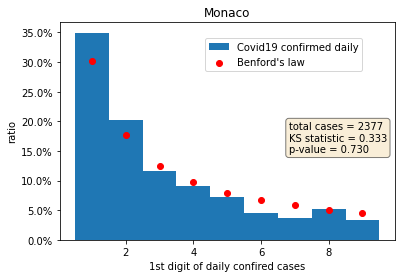

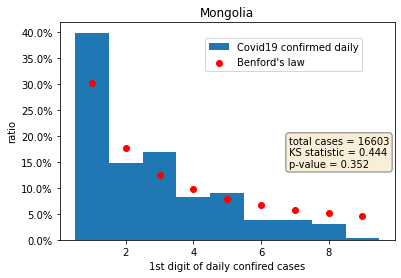

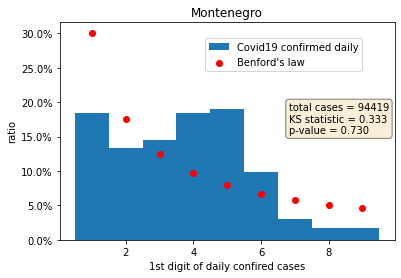

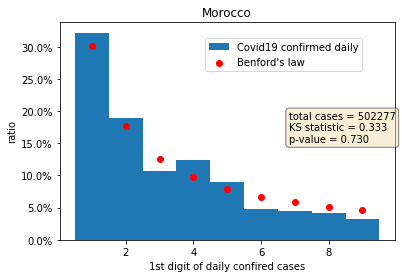

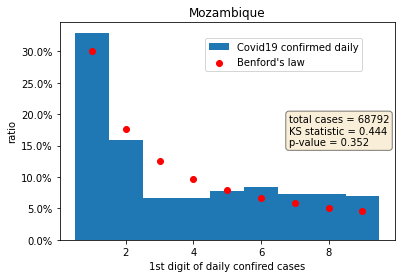

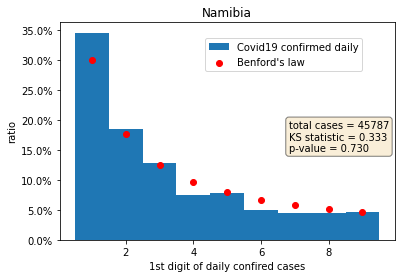

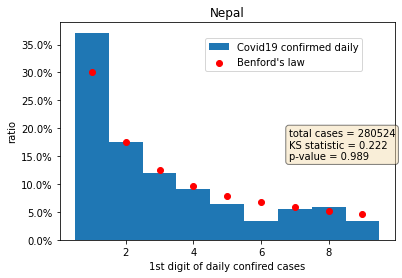

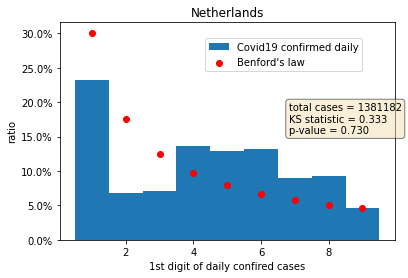

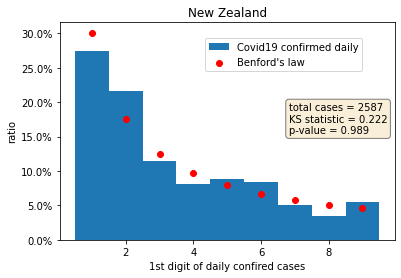

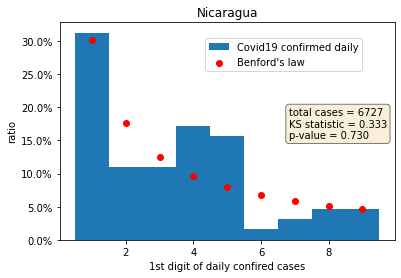

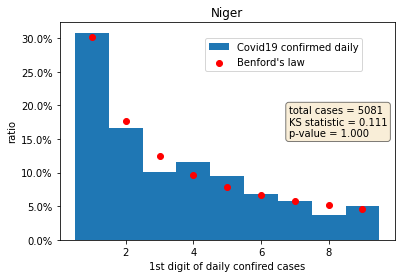

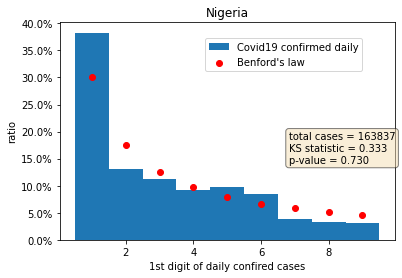

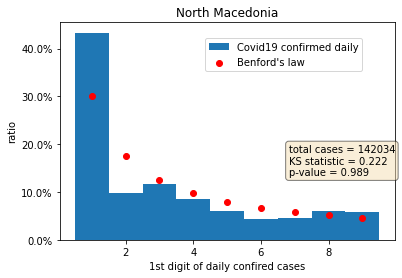

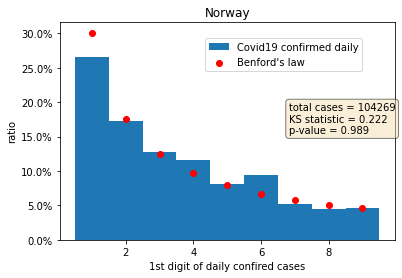

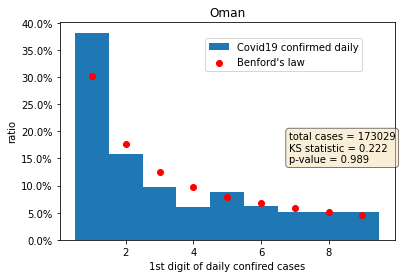

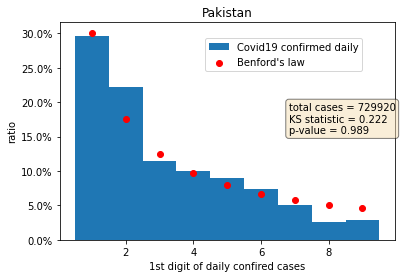

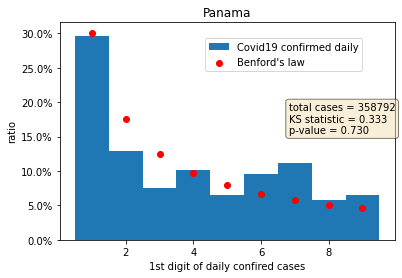

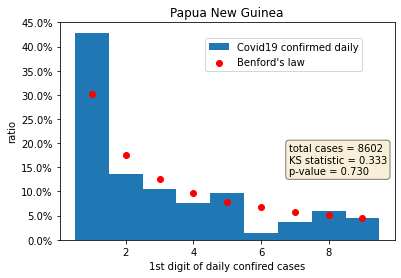

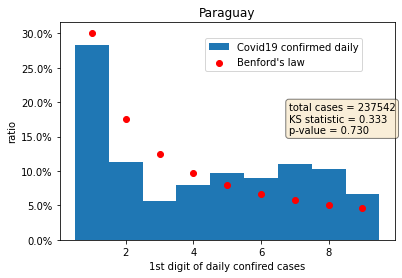

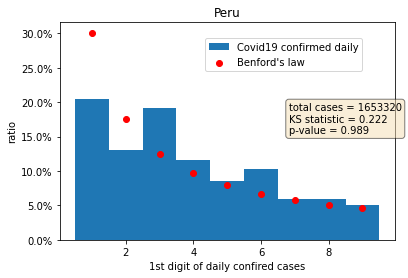

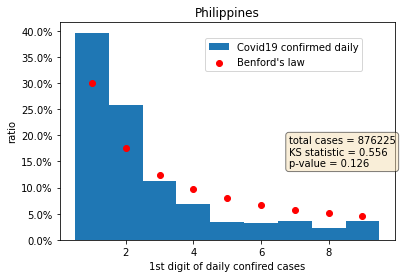

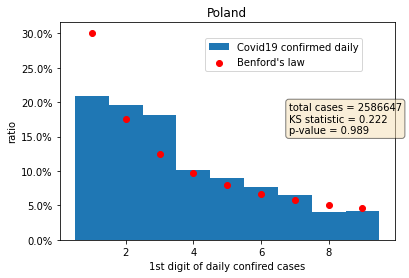

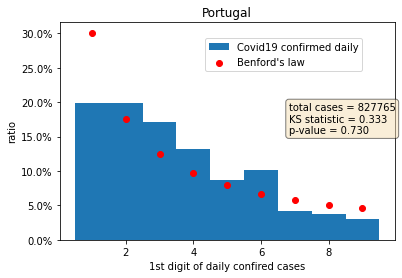

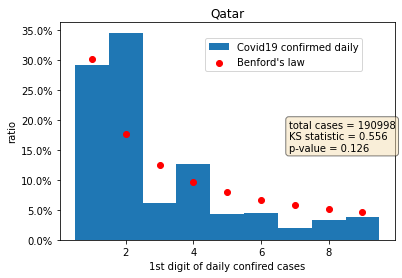

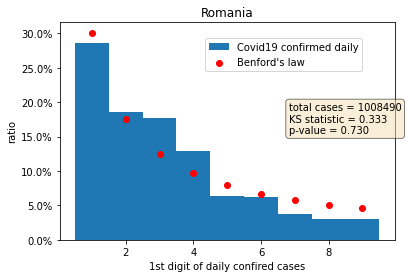

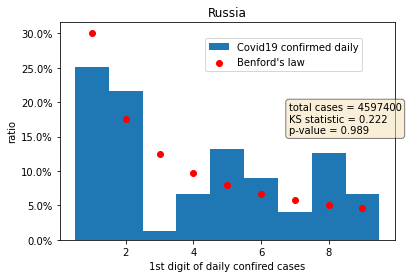

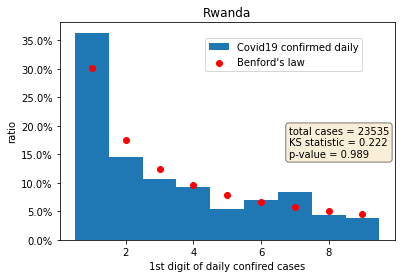

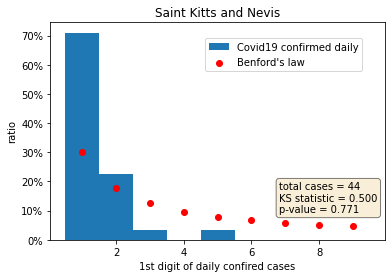

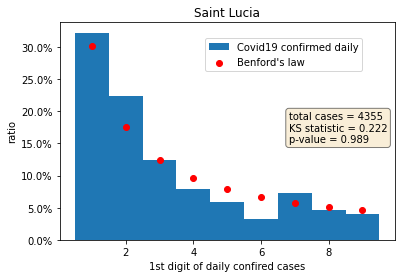

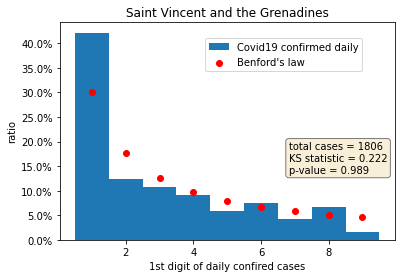

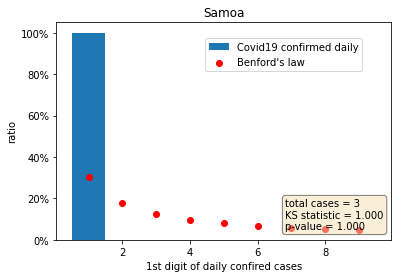

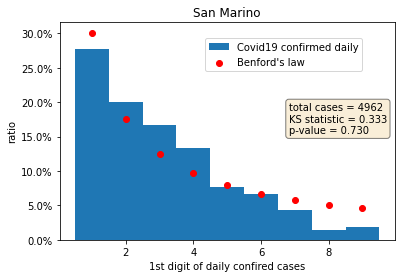

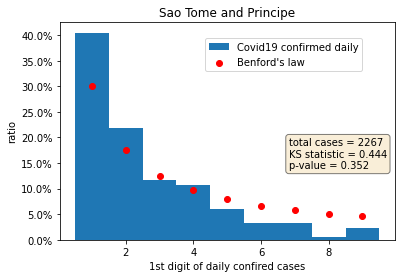

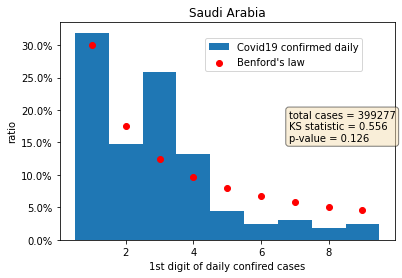

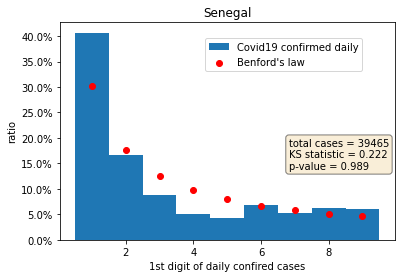

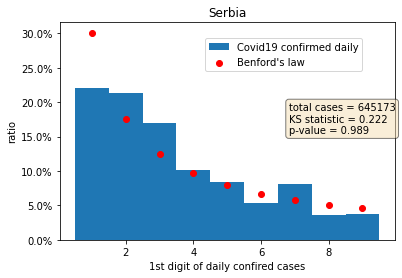

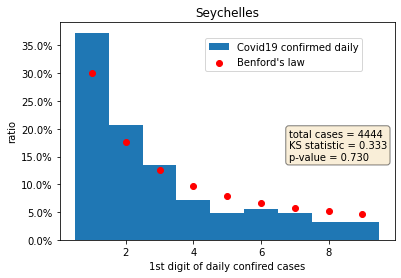

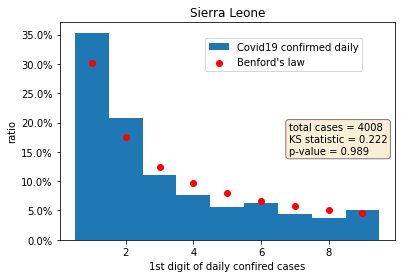

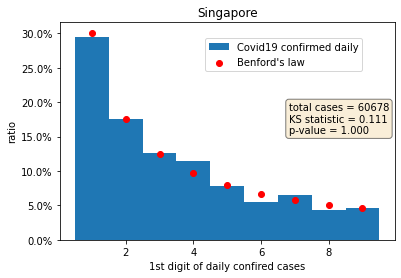

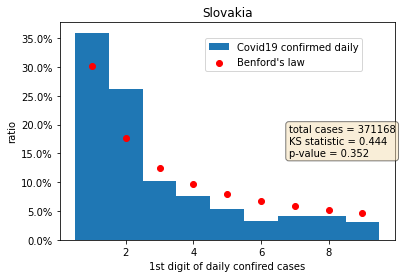

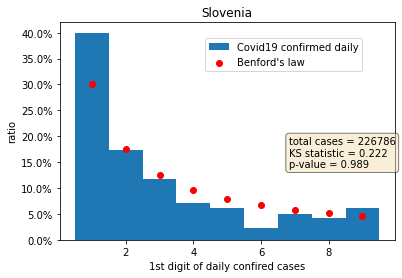

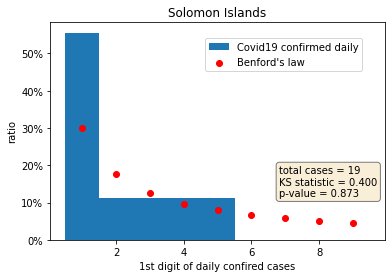

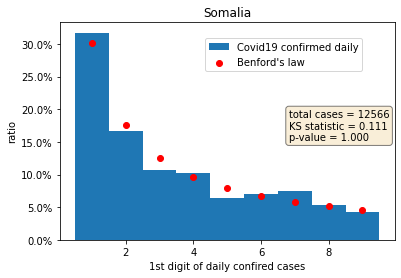

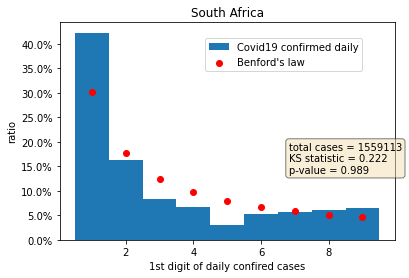

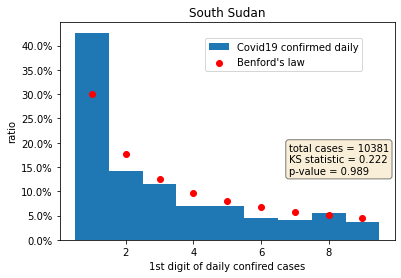

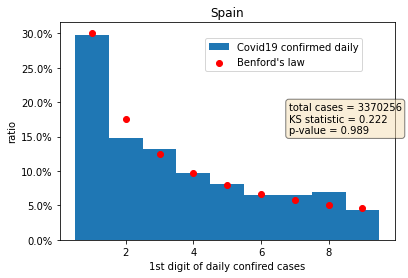

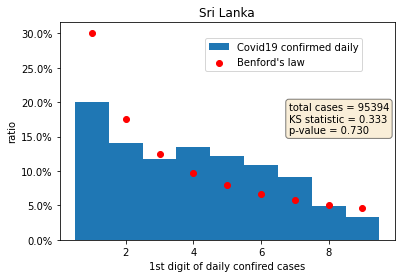

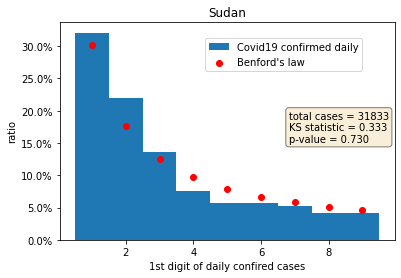

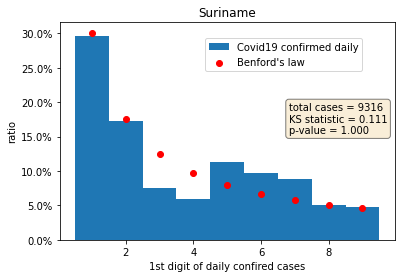

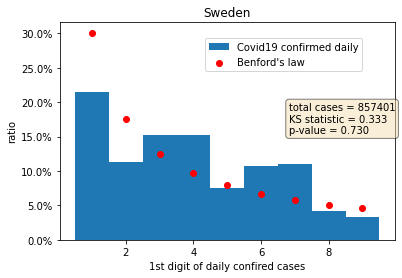

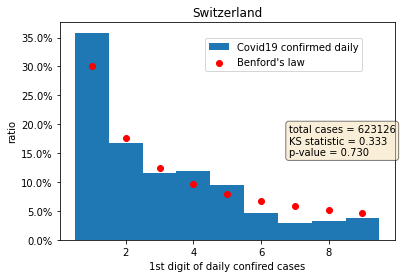

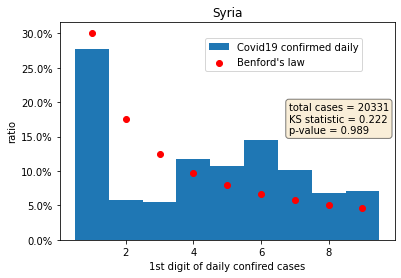

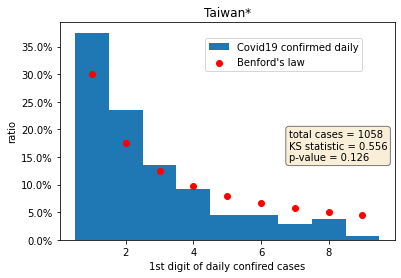

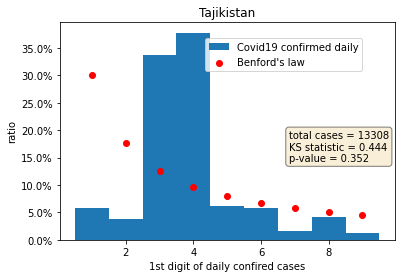

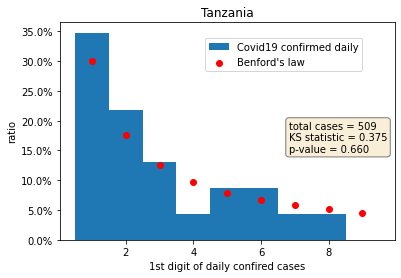

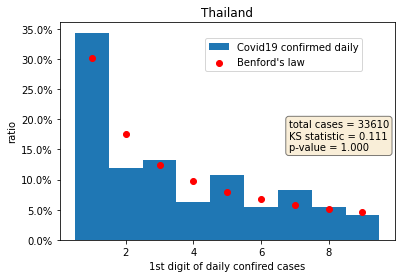

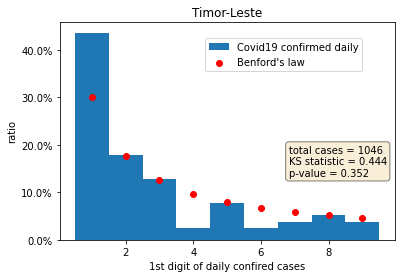

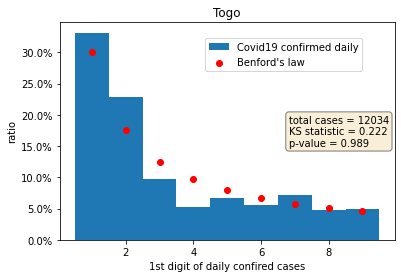

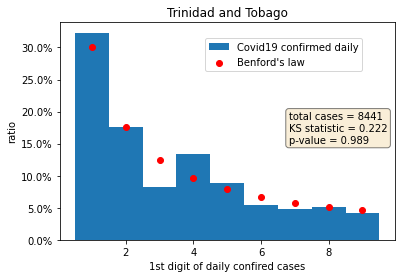

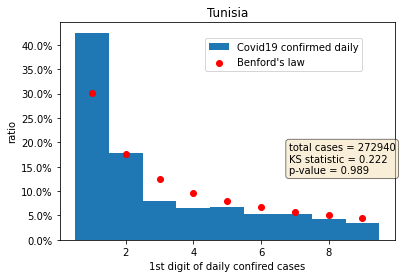

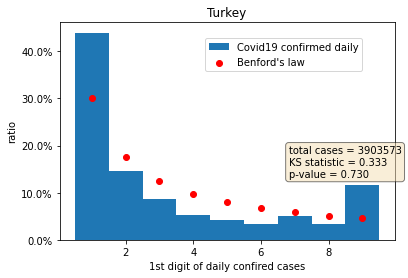

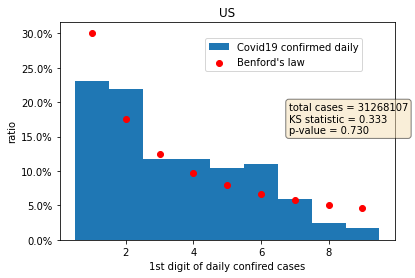

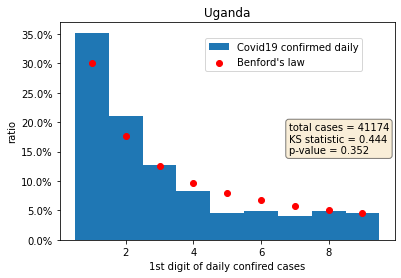

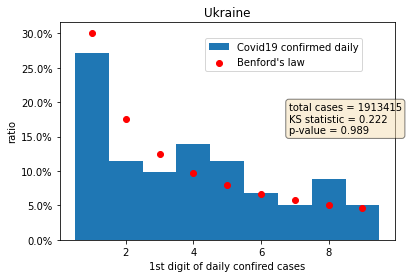

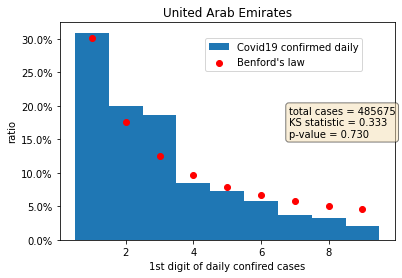

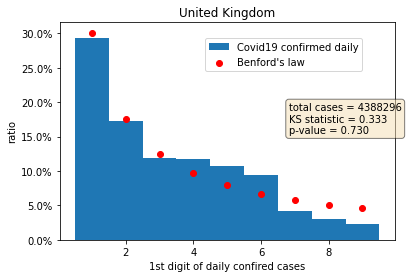

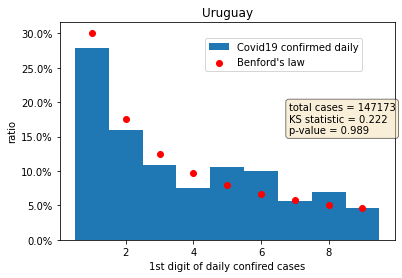

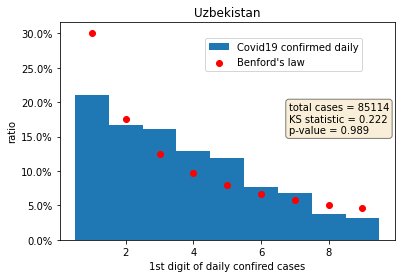

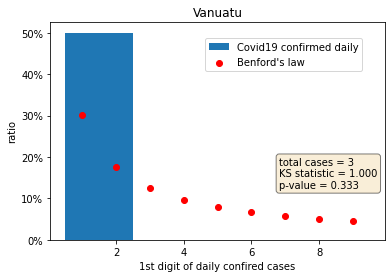

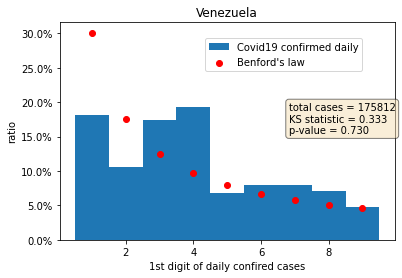

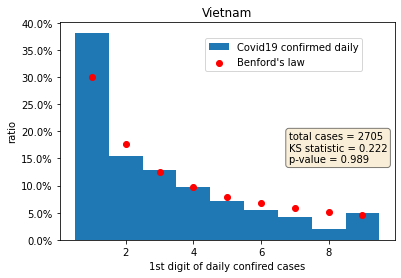

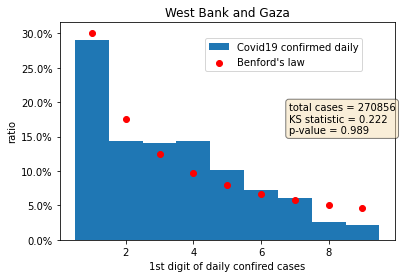

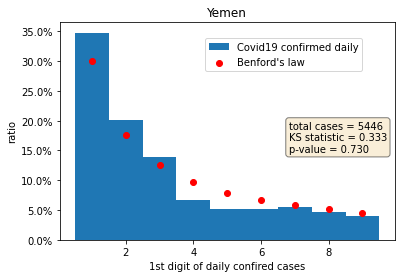

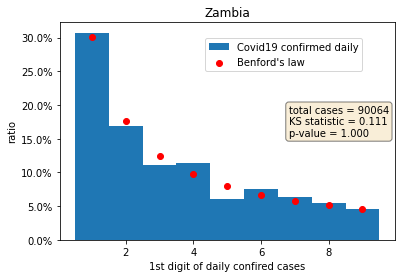

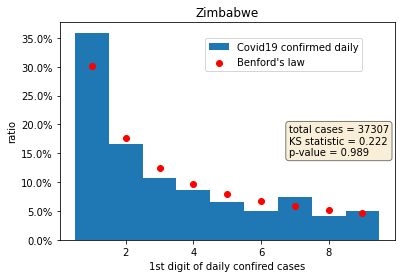

In [ ]:
# %% processing
covid19 = df.to_numpy()
covid19 = np.diff(covid19)
covid19[np.where(covid19<1)] = 0

for i in range(len(country)):
    countryname = country[i]
    covidConfirmed = covid19[i,:]
    for j in range(len(covidConfirmed)):
        digi1st = np.int64(str(covidConfirmed[j])[0])
        covidConfirmed[j] = digi1st
        
    # prepare the data for chi squared test    
    covidConfirmed = covidConfirmed.astype(float)
    covidConfirmed[np.where(covidConfirmed<1)] = np.nan
    covidUnique, covidCounts = np.unique(covidConfirmed[~np.isnan(covidConfirmed)],
                                          return_counts=True)

    covidPercent = covidCounts / np.nansum(covidCounts)
    y1 = np.log10(1 + 1/covidUnique) 
    #   scipy.stats.ks_2samp
    ks, p = stats.ks_2samp(covidPercent, y1)
    # If the K-S statistic is small or the p-value is high, then we cannot reject 
    # the hypothesis that the distributions of the two samples are the same.
    
    # plot
    fig, ax1 = plt.subplots()
    ax1.set(title = countryname, xlabel = '1st digit of daily confired cases', ylabel = 'ratio')
    nbins = np.linspace(0.5, 9.5, 10)
    ax1.hist(covidConfirmed, bins = nbins, density = True, label = 'Covid19 confirmed daily')
    x1 = np.linspace(1, 9, 9)
    y1 = np.log10(1 + 1/x1) 
    ax1.scatter(x1, y1,c='r', label = r"Benford's law", zorder = 3)
    ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    # textstr = (r'total cases = %.0f' % (totalCase[i]))
    textstr = '\n'.join((
        r'total cases = %.0f' % (totalCase[i], ),
        r'KS statistic = %.3f' % (ks, ),
        r'p-value = %.3f' % (p, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(6.82, 0.20, textstr, verticalalignment='top', bbox=props)
    fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
    # ax = plt.hist(np.histogram(covidConfirmed))

# Death Cases - First Digit of Daily Death Cases

In [ ]:
#%% load data
urlcovid = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(urlcovid)
df = df.groupby('Country/Region').sum()
df.reset_index(inplace=True)
country = df['Country/Region']
totalCase = df.iloc[:,-1]
df = df.drop(columns=['Lat','Long','Country/Region'])

In [ ]:
# %% processing
covid19 = df.to_numpy()
covid19 = np.diff(covid19)
covid19[np.where(covid19<1)] = 0

for i in range(len(country)):
    countryname = country[i]
    covidConfirmed = covid19[i,:]
    for j in range(len(covidConfirmed)):
        digi1st = np.int64(str(covidConfirmed[j])[0])
        covidConfirmed[j] = digi1st
        
    # prepare the data for chi squared test    
    covidConfirmed = covidConfirmed.astype(float)
    covidConfirmed[np.where(covidConfirmed<1)] = np.nan
    covidUnique, covidCounts = np.unique(covidConfirmed[~np.isnan(covidConfirmed)],
                                          return_counts=True)

    covidPercent = covidCounts / np.nansum(covidCounts)
    y1 = np.log10(1 + 1/covidUnique) 

    #   scipy.stats.ks_2samp
    if not len(y1):
        ks = np.nan
        p = np.nan
    else:
        ks, p = stats.ks_2samp(covidPercent, y1)
    # If the K-S statistic is small or the p-value is high, then we cannot reject 
    # the hypothesis that the distributions of the two samples are the same.

    # plot
    fig, ax1 = plt.subplots()
    ax1.set(title = countryname, xlabel = '1st digit of daily death cases', ylabel = 'ratio')
    nbins = np.linspace(0.5, 9.5, 10)
    ax1.hist(covidConfirmed, bins = nbins, density = True, label = 'Covid19 death daily')
    x1 = np.linspace(1, 9, 9)
    y1 = np.log10(1 + 1/x1) 
    ax1.scatter(x1, y1,c='r', label = r"Benford's law", zorder = 3)
    ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    # textstr = (r'total cases = %.0f' % (totalCase[i]))
    textstr = '\n'.join((
        r'total cases = %.0f' % (totalCase[i], ),
        r'KS statistic = %.3f' % (ks, ),
        r'p-value = %.3f' % (p, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(6.82, 0.20, textstr, verticalalignment='top', bbox=props)
    fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))
    # ax = plt.hist(np.histogram(covidConfirmed))